In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\samri\Downloads\Dataset .csv")

# Clean column names
df.columns = df.columns.str.strip()

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('Aggregate rating', axis=1)
y = df_encoded['Aggregate rating']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("🔷 Linear Regression")
print("R² Score:", r2_score(y_test, lr_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, lr_pred)))


🔷 Linear Regression
R² Score: 0.9596404578336791
RMSE: 0.30308862857180513


In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
# Assuming you used a LinearRegression model
import pandas as pd

# Create a DataFrame for feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value of coefficients (influence strength)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top influential features
print(coeff_df[['Feature', 'Coefficient']])



                                                 Feature  Coefficient
9583   Address_36, Food Court, 2nd Floor, Pacific Mal...     1.271921
20826                              Rating text_Not rated    -1.239501
20822                                 Rating color_White    -1.239501
20824                              Rating text_Excellent     1.135825
13421  Address_K 11, Som Vihar Apartments, R K Puram,...     1.130112
...                                                  ...          ...
12527  Address_G 75, Agarwal Cyber Plaza II, Netaji S...     0.000000
8110              Address_13/41, Geeta Colony, New Delhi     0.000000
8106             Address_13/283, Geeta Colony, New Delhi     0.000000
18235              Locality Verbose_Kankanady, Mangalore     0.000000
15748  Address_Shop 4, DDA Market, Near Maharaja Agra...     0.000000

[20829 rows x 2 columns]


In [ ]:
import pandas as pd

# Assuming rf_model is your trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for better readability
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_importance)


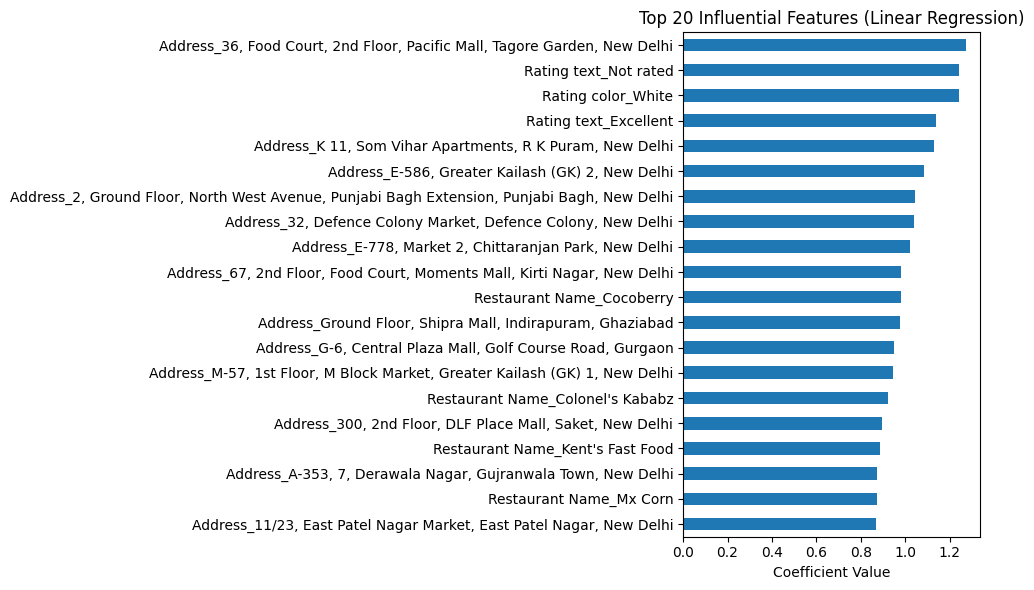

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
import matplotlib.pyplot as plt
import pandas as pd
coefficients = pd.Series(lr_model.coef_, index=X.columns)

# Show top 20 absolute coefficients
top_features = coefficients.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh')
plt.title("Top 20 Influential Features (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

